In [1]:
import csv,sys
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import GridSearchCV 
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, train_test_split 
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score
from sklearn.metrics import recall_score, f1_score, classification_report
from sklearn import svm
import matplotlib.pyplot as plt
from nltk.stem import PorterStemmer 

In [2]:
# Load data
fl=open('/content/SMSSpamCollection.csv', 'r')  
# Source: https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection


reader = list(csv.reader(fl,delimiter='\t'))

In [3]:
data=[]; labels=[];
for item in reader:
    labels.append(item[0])    
    data.append(item[1])
len(data)

5572

In [4]:
print(labels)

['ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham', 'spam', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham', 's

In [5]:
porter = PorterStemmer()
for i in range(len(data)):
  data[i] = porter.stem(data[i])

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN


              precision    recall  f1-score   support

         ham       0.99      0.68      0.81       966
        spam       0.32      0.97      0.48       149

    accuracy                           0.72      1115
   macro avg       0.66      0.83      0.64      1115
weighted avg       0.90      0.72      0.76      1115


 Total documents in the training set: 4457


 Total documents in the test set: 1115


 Confusion Matrix 



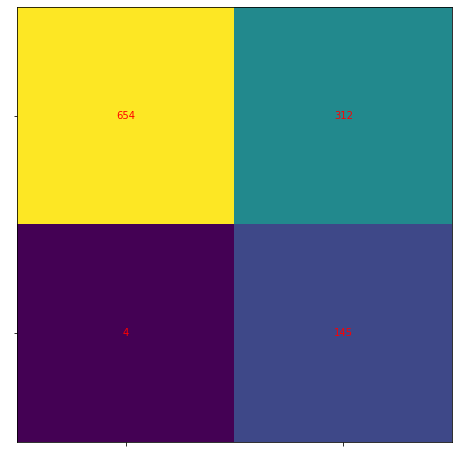


 Precision:0.7165919282511211

 Recall:0.7165919282511211

 Macro Averaged F1-Score :0.6419832869986505

 Micro Averaged F1-Score:0.7165919282511212


In [6]:
clf=MultinomialNB(alpha=0,fit_prior=True, class_prior=None)  
vectorizer=TfidfVectorizer(stop_words='english',ngram_range=(2,3),
                           token_pattern=r'\b\w+\b')
tfidf = vectorizer.fit_transform(data)
tfidf = tfidf.toarray()
# Training and Test Split           
trn_data, tst_data, trn_cat, tst_cat = train_test_split(tfidf, labels, 
                                                        test_size=0.20, 
                                                        random_state=42,
                                                        stratify=labels)   

#Classificaion    
clf.fit(trn_data,trn_cat)
predicted = clf.predict(tst_data)
predicted =list(predicted)
print(classification_report(tst_cat, predicted))

# Evaluation
print('\n Total documents in the training set: '+str(len(trn_data))+'\n')    
print('\n Total documents in the test set: '+str(len(tst_data))+'\n')
print ('\n Confusion Matrix \n')  
cm = confusion_matrix(tst_cat, predicted)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=(' ', ' '))
ax.yaxis.set(ticks=(0, 1), ticklabels=(' ', ' '))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show() 

pr=precision_score(tst_cat, predicted, average='micro') 
print ('\n Precision:'+str(pr)) 

rl=recall_score(tst_cat, predicted, average='micro') 
print ('\n Recall:'+str(rl))

fm=f1_score(tst_cat, predicted, average='macro') 
print ('\n Macro Averaged F1-Score :'+str(fm))

fm=f1_score(tst_cat, predicted, average='micro') 
print ('\n Micro Averaged F1-Score:'+str(fm))

********* Best Set of Parameters ********* 


Pipeline(steps=[('vect',
                 CountVectorizer(min_df=3, ngram_range=(1, 3),
                                 token_pattern='\\b\\w+\\b')),
                ('tfidf', TfidfTransformer()),
                ('clf',
                 LogisticRegression(class_weight='balanced',
                                    solver='newton-cg'))])
              precision    recall  f1-score   support

         ham       0.99      0.99      0.99       966
        spam       0.94      0.94      0.94       149

    accuracy                           0.98      1115
   macro avg       0.97      0.97      0.97      1115
weighted avg       0.98      0.98      0.98      1115


 Total documents in the training set: 4457


 Total documents in the test set: 1115


 Confusion Matrix 



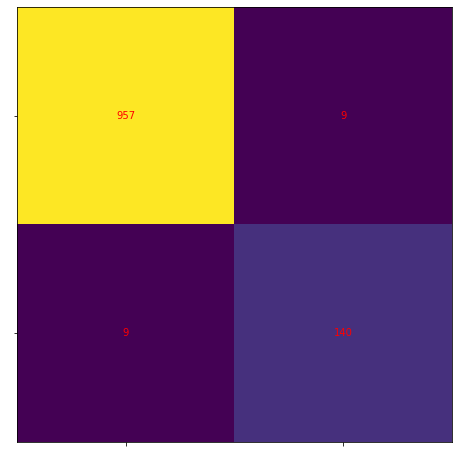


 Precision:0.9838565022421525

 Recall:0.9838565022421525

 Macro Averaged F1-Score :0.9651402726249532

 Micro Averaged F1-Score:0.9838565022421525


In [7]:
trn_data, tst_data, trn_cat, tst_cat = train_test_split(data, labels, 
                                                        test_size=0.20, 
                                                        random_state=42,
                                                        stratify=labels)   

#Classifier
clf=LogisticRegression(class_weight='balanced') 
clf_parameters = {
'clf__solver':('newton-cg','lbfgs','liblinear'),
}    
        
#Feature Extraction
pipeline = Pipeline([
('vect', CountVectorizer(token_pattern=r'\b\w+\b')),
('tfidf', TfidfTransformer(use_idf=True,smooth_idf=True)),     
('clf', clf),]) 
    
feature_parameters = {
'vect__min_df': (2,3),
'vect__ngram_range': ((1,1),(1, 2),(1,3),(2,3)),  
# Unigrams, Bigrams or Trigrams
}

#Classificaion
parameters={**feature_parameters,**clf_parameters} 
grid = GridSearchCV(pipeline,parameters,scoring='f1_micro',cv=10)          
grid.fit(trn_data,trn_cat)     
clf= grid.best_estimator_  
print('********* Best Set of Parameters ********* \n\n')
print(clf)

predicted = clf.predict(tst_data)
predicted =list(predicted)
print(classification_report(tst_cat, predicted))
# Evaluation
print('\n Total documents in the training set: '+str(len(trn_data))+'\n')    
print('\n Total documents in the test set: '+str(len(tst_data))+'\n')
print ('\n Confusion Matrix \n')  
cm = confusion_matrix(tst_cat, predicted)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=(' ', ' '))
ax.yaxis.set(ticks=(0, 1), ticklabels=(' ', ' '))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show() 

pr=precision_score(tst_cat, predicted, average='micro') 
print ('\n Precision:'+str(pr)) 

rl=recall_score(tst_cat, predicted, average='micro') 
print ('\n Recall:'+str(rl))

fm=f1_score(tst_cat, predicted, average='macro') 
print ('\n Macro Averaged F1-Score :'+str(fm))

fm=f1_score(tst_cat, predicted, average='micro') 
print ('\n Micro Averaged F1-Score:'+str(fm))

********* Best Set of Parameters ********* 


Pipeline(steps=[('vect',
                 CountVectorizer(min_df=2, ngram_range=(1, 3),
                                 token_pattern='\\b\\w+\\b')),
                ('tfidf', TfidfTransformer()),
                ('clf', LinearSVC(class_weight='balanced'))])
              precision    recall  f1-score   support

         ham       0.99      1.00      0.99       966
        spam       0.97      0.95      0.96       149

    accuracy                           0.99      1115
   macro avg       0.98      0.97      0.98      1115
weighted avg       0.99      0.99      0.99      1115


 Total documents in the training set: 4457


 Total documents in the test set: 1115


 Confusion Matrix 



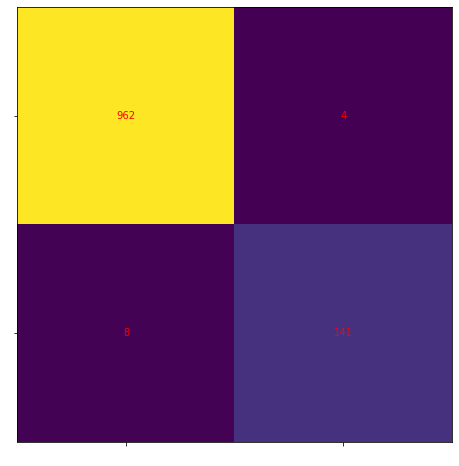


 Precision:0.989237668161435

 Recall:0.989237668161435

 Macro Averaged F1-Score :0.9764926631809748

 Micro Averaged F1-Score:0.989237668161435


In [8]:
from sklearn import svm
clf = svm.LinearSVC(class_weight='balanced')
pipeline = Pipeline([(
    'vect',CountVectorizer(token_pattern=r'\b\w+\b')),
    ('tfidf', TfidfTransformer(use_idf=True,smooth_idf=True)), 
    ('clf',clf),])
feature_parameters = {'vect__min_df': (2,3),
 'vect__ngram_range': ((1,1),(1, 2),(1,3)),}
parameters={**feature_parameters}
grid = GridSearchCV(pipeline,parameters,scoring='f1_micro',cv=10)
grid.fit(trn_data,trn_cat)
clf= grid.best_estimator_  
print('********* Best Set of Parameters ********* \n\n')
print(clf)
    
predicted = clf.predict(tst_data)
predicted =list(predicted)
print(classification_report(tst_cat, predicted))
# Evaluation
print('\n Total documents in the training set: '+str(len(trn_data))+'\n')    
print('\n Total documents in the test set: '+str(len(tst_data))+'\n')
print('\n Confusion Matrix \n')  
cm = confusion_matrix(tst_cat, predicted)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=(' ', ' '))
ax.yaxis.set(ticks=(0, 1), ticklabels=(' ', ' '))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show() 

pr=precision_score(tst_cat, predicted, average='micro') 
print ('\n Precision:'+str(pr)) 

rl=recall_score(tst_cat, predicted, average='micro') 
print ('\n Recall:'+str(rl))

fm=f1_score(tst_cat, predicted, average='macro') 
print ('\n Macro Averaged F1-Score :'+str(fm))

fm=f1_score(tst_cat, predicted, average='micro') 
print ('\n Micro Averaged F1-Score:'+str(fm))